<a href="https://colab.research.google.com/github/LifehackerLHZ/Artificial-intelligence-curriculum-design/blob/main/sentiment_analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing
**Natural Language Processing or NLP** is a branch of Artificial Intelligence which deal with bridging the machines understanding humans in their Natural Language. Natural Language can be in form of text or sound, which are used for humans to communicate each other. NLP can enable humans to communicate to machines in a natural way.


**Text Classification** is a process involved in Sentiment Analysis. It is classification of peoples opinion or expressions into different sentiments. Sentiments include *Positive, Neutral*, and *Negative*, *Review Ratings* and *Happy, Sad*. Sentiment Analysis can be done on different consumer centered industries to analyse people's opinion on a particular product or subject.
![Sentiment Analysis](https://media-exp1.licdn.com/dms/image/C4D12AQHPAZFZZxBtng/article-cover_image-shrink_600_2000/0?e=1593648000&v=beta&t=eQAR5WOihE2_ZCCAJbsgNyJlaI_GW7u8lDw45zGbfuU)
> Sentiment Classification is a perfect problem in NLP for getting started in it. You can really learn a lot of concepts and techniques to master through doing project. Kaggle is a great place to learn and contribute your own ideas and creations. I learnt lot of things from other, now it's my turn to make document my project.

I will go through all the key and fundament concepts of NLP and Sequence Models, which you will learn in this notebook.
![Sentiment Analysis](https://fiverr-res.cloudinary.com/images/t_main1,q_auto,f_auto,q_auto,f_auto/gigs/121192228/original/677c209a0a064cb9253973d3663684acf91dab84/do-nlp-projects-with-python-nltk-gensim.jpg)
Let's get started with code without furthur ado.

<font color='red'> If you find this notebook helpful, please leave a UPVOTE to encourage me</font>

##  Importing Dependencies
   We shall start by importing all the neccessary libraries. I will explain the exact use of each library later in this notebook.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)
print("Starting TensorFlow Version Check")
print("TensorFlow Version:", tf.__version__)
print("End of Code")


Tensorflow Version 2.15.0
Starting TensorFlow Version Check
TensorFlow Version: 2.15.0
End of Code


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#  Dataset Preprocessing
In this notebook, I am using **Sentiment-140** from [Kaggle](https://www.kaggle.com/kazanova/sentiment140). It contains a labels data of 1.6 Million Tweets and I find it a good amount of data to train our model.

In [3]:
df = pd.read_csv('/content/go_emotions_dataset.csv',
                 encoding = 'latin',header=0)
df.head()

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldnât be a grouping category...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# 去掉 `example_very_unclear` 列中值为 True 的行
df = df[df['example_very_unclear'] == False]

# 删除 `id` 和 `example_very_unclear` 列
df = df.drop(columns=['id', 'example_very_unclear'])


df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Right? Considering itâs such an important do...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def merge_labels(row):
    labels = df.columns[1:]  # 获取除了 `text` 列外的所有情感标签列
    active_labels = [label for label, value in zip(labels, row[1:]) if value == 1]  # 这里是整数 1，不是字符串 '1'
    return ','.join(active_labels) if active_labels else 'neutral'

# 应用函数来创建 `sentiment` 列
df['sentiment'] = df.apply(merge_labels, axis=1)

# 保留 `text` 和 `sentiment` 列
df = df[['text', 'sentiment']]

df.head()

,text,sentiment
0,That game hurt.,sadness
2,"You do right, if you don't care then fuck 'em!",neutral
3,Man I love reddit.,love
4,"[NAME] was nowhere near them, he was by the Fa...",neutral
5,Right? Considering itâs such an important do...,gratitude


In [6]:
from collections import defaultdict

# 创建一个默认字典，键为情感标签，值为文本列表
emotion_texts = defaultdict(list)

# 遍历每一行数据
for idx, row in df.iterrows():
    sentiments = row['sentiment'].split(',')  # 获取每行的情感标签列表
    text = row['text']
    for sentiment in sentiments:
        emotion_texts[sentiment].append(text)  # 将文本添加到对应情感标签的列表中

# 将情感标签按包含文本数量排序
sorted_emotion_texts = sorted(emotion_texts.items(), key=lambda item: len(item[1]), reverse=True)

# 检查每个情感标签对应的文本数量（已排序）
for sentiment, texts in sorted_emotion_texts:
    print(f"Emotion: {sentiment}, Number of texts: {len(texts)}")
    print(f"Sample texts: {texts[:3]}")  # 打印出前3个文本作为示例
    print("\n---\n")

# 如果需要，可以保存到文件
import json
with open('sorted_emotion_texts.json', 'w') as f:
    json.dump(dict(sorted_emotion_texts), f)


Emotion: neutral, Number of texts: 55298
Sample texts: ["You do right, if you don't care then fuck 'em!", '[NAME] was nowhere near them, he was by the Falcon. ', "I have, and now that you mention it, I think that's what triggered my nostalgia. "]

---

Emotion: approval, Number of texts: 17620
Sample texts: ['If thereâ\x80\x99s a pattern, yes.', "I didn't like the family ending but I liked the Atlantis ending especially as we know we are going to see more of it in DLC2.", 'Political affiliations has only little correlation to individual intellectual ability']

---

Emotion: admiration, Number of texts: 17131
Sample texts: ["I appreciate it, that's good to know. I hope I'll have to apply that knowledge one day", "Pretty much every Punjabi dude I've met.", 'Lots, play store or apple store vpn. Nord is good']

---

Emotion: annoyance, Number of texts: 13618
Sample texts: ["For extra measure tape it right by your crotch so she can't take it for sexual assault reasons", 'Go troll elsewhere.

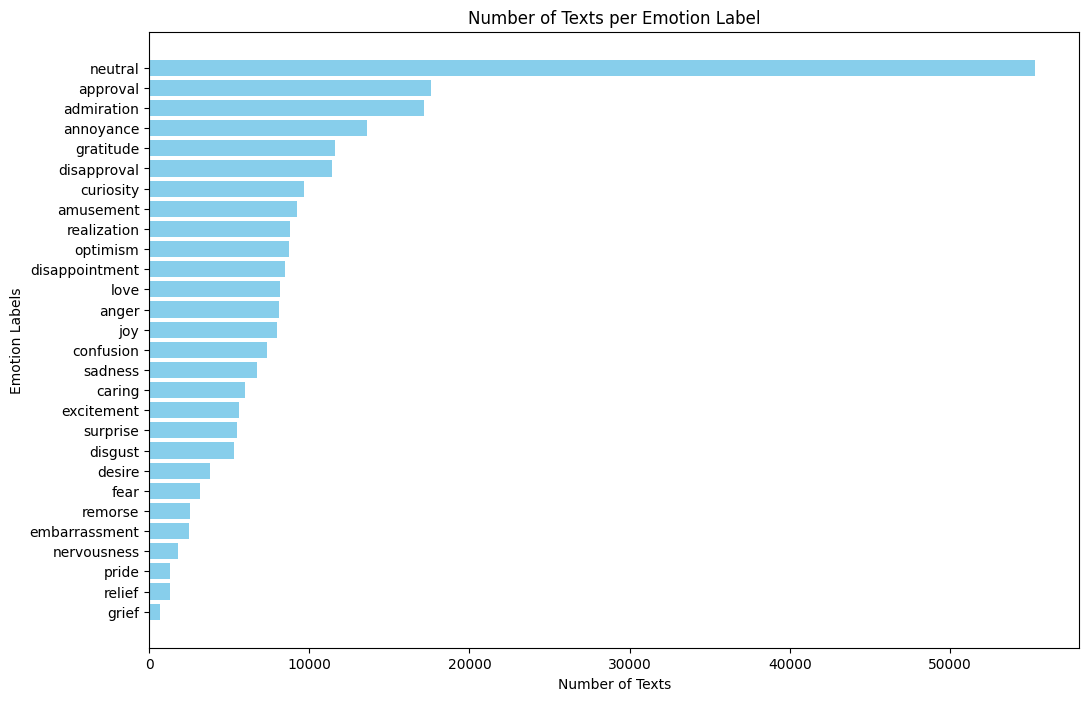

In [7]:
import matplotlib.pyplot as plt

# 将情感标签按包含文本数量排序
sorted_emotion_texts = sorted(emotion_texts.items(), key=lambda item: len(item[1]), reverse=True)

# 提取情感标签和对应的文本数量
emotions = [item[0] for item in sorted_emotion_texts]
text_counts = [len(item[1]) for item in sorted_emotion_texts]

# 绘制柱状图
plt.figure(figsize=(12, 8))
plt.barh(emotions, text_counts, color='skyblue')
plt.xlabel('Number of Texts')
plt.ylabel('Emotion Labels')
plt.title('Number of Texts per Emotion Label')
plt.gca().invert_yaxis()  # 反转Y轴使最大数量的标签在顶部
plt.show()


In [8]:
print(df)

                                                     text   sentiment
0                                         That game hurt.     sadness
2          You do right, if you don't care then fuck 'em!     neutral
3                                      Man I love reddit.        love
4       [NAME] was nowhere near them, he was by the Fa...     neutral
5       Right? Considering itâs such an important do...   gratitude
...                                                   ...         ...
211219  Well, I'm glad you're out of all that now. How...         joy
211220                             Everyone likes [NAME].        love
211221  Well when youâve imported about a gazillion ...      caring
211222                                 That looks amazing  admiration
211223  The FDA has plenty to criticize. But like here...       anger

[207814 rows x 2 columns]


Looks like we have a nasty data in text. Because in general we use lot of punctuations and other words without any contextual meaning. It have no value as feature to the model we are training. So we need to get rid of them.

# Text Preprocessing
Tweet texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model. We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods. Let's continue
![Data Science Meme](https://miro.medium.com/max/800/1*Xhm9c9qDfXa3ZCQjiOvm_w.jpeg)


### Stemming/ Lematization
For grammatical reasons, documents are going to use different forms of a word, such as *write, writing and writes.* Additionally, there are families of derivationally related words with similar meanings. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Stemming usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes.

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base and dictionary form of a word
![Stemming and Lematization](https://qph.fs.quoracdn.net/main-qimg-cd7f4bafaa42639deb999b1580bea69f)

### Hyperlinks and Mentions
Twitter is a social media platform where people can tag and mentions other people's ID and share videos and blogs from internet. So the tweets often contain lots of Hyperlinks and twitter mentions.

- Twitter User Mentions - Eg. @arunrk7, @andrewng
- Hyperlinks - Eg. https://keras.io, https://tensorflow.org

### Stopwords
Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification. Some stopwords are...
![Stopwords English](https://4.bp.blogspot.com/-yiEr-jCVv38/Wmk10d84DYI/AAAAAAAAk0o/IfgjfjpgrxM5NosUQrGw7PtLvgr6DAG8ACLcBGAs/s1600/Screen%2BShot%2B2018-01-24%2Bat%2B5.41.21%2BPM.png)

That looks like a tedious process, isn't?. Don't worry there is always some library in Python to do almost any work. The world is great!!!

**NLTK** is a python library which got functions to perform text processing task for NLP.



In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# 确保需要的 NLTK 资源已经下载
nltk.download('stopwords')

# 停用词表
stop_words = stopwords.words('english')

# 选择词干提取器
stemmer = SnowballStemmer('english')

# 定义文本清理的正则表达式模式
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# 定义预处理函数
def preprocess(text, stem=False):
    # 将文本转换为小写，并去除特殊符号
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:  # 去除停用词
            if stem:
                tokens.append(stemmer.stem(token))  # 词干提取
            else:
                tokens.append(token)
    return " ".join(tokens)

# 对数据集中的 `text` 列应用预处理函数
df['text'] = df['text'].apply(lambda x: preprocess(x))

# 查看预处理后的数据
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  sentiment
0                                          game hurt    sadness
2                                 right care fuck em    neutral
3                                    man love reddit       love
4                           name nowhere near falcon    neutral
5  right considering important document know damn...  gratitude


## Train and Test Split

In [10]:
df['sentiment'] = df['sentiment'].apply(lambda x: x.split(','))

# 现在 'sentiment' 列中的每个值都变成了一个情感标签的列表，例如 ['anger', 'sadness']
print(df['sentiment'].head(50))

0                     [sadness]
2                     [neutral]
3                        [love]
4                     [neutral]
5                   [gratitude]
6                 [disapproval]
7                   [amusement]
8                   [amusement]
9                   [amusement]
10                    [neutral]
11             [disappointment]
12                    [neutral]
13    [disappointment, disgust]
14                    [neutral]
15      [admiration, gratitude]
16                    [neutral]
17                [realization]
18                 [admiration]
19                  [annoyance]
20                    [neutral]
21                  [confusion]
22                   [optimism]
23       [curiosity, gratitude]
24                    [neutral]
25                 [excitement]
26                    [neutral]
27                     [caring]
28                 [admiration]
29      [disgust, joy, sadness]
30                    [neutral]
31                    [neutral]
32    [d

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

# 初始化 MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# 将标签转换为二进制格式
y_encoded = mlb.fit_transform(df['sentiment'])

# y_encoded 是一个二维数组，每行是一个二进制向量，表示各情感标签的存在与否
print(y_encoded)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [12]:
from sklearn.model_selection import train_test_split

# 首先，从预处理后的 df 中提取 'text' 和编码后的标签
X = df['text']
y = y_encoded

# 先划分出训练集和测试集，保留验证集的划分比例
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# 将临时集合再划分为验证集和测试集
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 打印出每个数据集的大小
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Training set size: 155860
Validation set size: 25977
Test set size: 25977


In [13]:
print(f"Original dataframe size: {df.shape}")


Original dataframe size: (207814, 2)


`train_test_split` will shuffle the dataset and split it to gives training and testing dataset. It's important to shuffle our dataset before training.

In [14]:
X_train.head(10)

80404     mine size pinky honestly get size want mindful...
181000    watched eating hash browns covered ketchup sob...
69251     excellent name name particular made discover l...
52239                        stop bullshit keep ab pick one
203516    must couple alt left students berkeley cummuni...
173574    yeah reduce number kids taking pills make enjo...
111848                               even reason nurse side
76786                                      ah gotcha thanks
139581             get married love afraid thing wil happen
103735                                           pizza time
Name: text, dtype: object

# Tokenization
Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called *tokens* , perhaps at the same time throwing away certain characters, such as punctuation. The process is called **Tokenization.**
![Tokenization](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png)

`tokenizer` create tokens for every word in the data corpus and map them to a index using dictionary.

`word_index` contains the index for each word

`vocab_size` represents the total number of word in the data corpus

In [15]:
from keras.preprocessing.text import Tokenizer

# 创建一个Tokenizer对象
tokenizer = Tokenizer()

# 使用训练集的文本数据来训练Tokenizer，这将生成词汇表并为每个词分配一个唯一的整数索引
tokenizer.fit_on_texts(X_train)

# 获取词汇表中的每个词及其频率
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # 词汇表的大小
print("Vocabulary Size:", vocab_size)

# 显示词汇表中的前20个词及其频率
word_freq = tokenizer.word_counts
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

print("Top 20 most common words in the vocabulary:")
for word, freq in sorted_word_freq[:20]:
    print(f"Word: {word}, Frequency: {freq}")

# 如果要查看所有词汇及其频率，可以去掉上面的[:20]限制


Vocabulary Size: 30293
Top 20 most common words in the vocabulary:
Word: name, Frequency: 28255
Word: like, Frequency: 12253
Word: get, Frequency: 6904
Word: one, Frequency: 6704
Word: would, Frequency: 6561
Word: people, Frequency: 6479
Word: love, Frequency: 6171
Word: good, Frequency: 6117
Word: think, Frequency: 5426
Word: really, Frequency: 5334
Word: know, Frequency: 5326
Word: time, Frequency: 4348
Word: see, Frequency: 4191
Word: lol, Frequency: 3961
Word: thanks, Frequency: 3932
Word: even, Frequency: 3617
Word: much, Frequency: 3581
Word: oh, Frequency: 3501
Word: still, Frequency: 3476
Word: got, Frequency: 3426


Now we got a `tokenizer` object, which can be used to covert any word into a Key in dictionary (number).

Since we are going to build a sequence model. We should feed in a sequence of numbers to it. And also we should ensure there is no variance in input shapes of sequences. It all should be of same lenght. But texts in tweets have different count of words in it. To avoid this, we seek a little help from `pad_sequence` to do our job. It will make all the sequence in one constant length `MAX_SEQUENCE_LENGTH`.

In [16]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# 将文本转为序列
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# 填充序列使其具有相同的长度
maxlen = 100  # 您可以根据数据分布调整这个长度
X_train_padded = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_val_padded = pad_sequences(X_val_seq, padding='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

# 打印结果以验证
print("X_train_padded shape:", X_train_padded.shape)
print("X_val_padded shape:", X_val_padded.shape)
print("X_test_padded shape:", X_test_padded.shape)

X_train_padded shape: (155860, 100)
X_val_padded shape: (25977, 100)
X_test_padded shape: (25977, 100)


# Word Emdedding
In Language Model, words are represented in a way to intend more meaning and for learning the patterns and contextual meaning behind it.

**Word Embedding** is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

Basically, it's a feature vector representation of words which are used for other natural language processing applications.

We could train the embedding ourselves but that would take a while to train and it wouldn't be effective. So going in the path of Computer Vision, here we use **Transfer Learning**. We download the pre-trained embedding and use it in our model.

The pretrained Word Embedding like **GloVe & Word2Vec** gives more insights for a word which can be used for classification. If you want to learn more about the Word Embedding, please refer some links that I left at the end of this notebook.


In this notebook, I use **GloVe Embedding from Stanford AI** which can be found [here](https://nlp.stanford.edu/projects/glove/)

词嵌入（Word Embedding）是一种自然语言处理技术，它将每个词语转换成一个高维向量（一组数字）。简单来说，词嵌入就是给每个词语找一个“数字替身”，这个替身能反映词语的意义，让机器能够理解词语间的相似性和关联。



In [17]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-08-21 06:31:58--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-08-21 06:31:58--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-08-21 06:31:58--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

# 可以考虑用别的方法，比如Word2Vec


In [18]:
# 加载GloVe嵌入
GLOVE_EMB = '/content/glove.6B.300d.txt'  # 确保路径正确
EMBEDDING_DIM = 300
embeddings_index = {}

with open(GLOVE_EMB, encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [19]:
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print('Embedding matrix shape:', embedding_matrix.shape)

Embedding matrix shape: (30293, 300)


In [20]:
print(embeddings_index['name'])

[-6.7224e-02  2.4941e-02  1.0431e-03 -2.3729e-01  2.7817e-01 -1.6072e-01
 -5.6462e-01  4.1092e-01  1.1806e-01 -1.6352e+00 -6.1915e-02 -5.5573e-02
 -2.3415e-01  1.0863e-01  3.4281e-01  1.4300e-01 -1.1740e-01  1.8870e-01
  2.7195e-01 -1.4551e-01 -4.8355e-02  2.1435e-01 -1.4219e-01  2.4628e-01
 -4.6037e-01 -1.2373e-01 -2.0073e-01 -2.7823e-03  7.1141e-02  4.0765e-01
  3.0444e-01 -9.5174e-02 -2.4195e-01  6.1263e-01 -7.6692e-01 -8.4194e-02
  1.8643e-01 -4.7896e-01 -2.7727e-01 -2.7645e-01 -3.1911e-01  1.5813e-02
  4.2883e-01  6.9246e-01  2.5891e-01 -2.7131e-01  1.4478e-01  1.1649e-01
 -1.6624e-01 -1.2153e-01  2.6272e-01 -2.8253e-01  5.3802e-01  2.8233e-01
 -3.5959e-01  4.2076e-02  1.0141e-01  3.5170e-01  4.4478e-01 -2.5661e-01
  3.8307e-01  2.3477e-01  1.8910e-01  2.2958e-01  2.5929e-01 -1.7946e-01
  1.3575e-01  3.8908e-01  2.2307e-01  2.5210e-01  5.6227e-02  1.7931e-01
  2.2964e-01  1.2317e-01 -5.1786e-01 -2.7007e-01  7.1541e-01  1.2386e-01
  3.2207e-02 -5.6925e-02  4.6914e-02  6.9053e-01 -3

# Model Training - LSTM
We are clear to build our Deep Learning model. While developing a DL model, we should keep in mind of key things like Model Architecture, Hyperparmeter Tuning and Performance of the model.

As you can see in the word cloud, the some words are predominantly feature in both Positive and Negative tweets. This could be a problem if we are using a Machine Learning model like Naive Bayes, SVD, etc.. That's why we use **Sequence Models**.

### Sequence Model
![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction.

For model architecture, we use

1) **Embedding Layer** - Generates Embedding Vector for each input sequence.

2) **Conv1D Layer** - Its using to convolve data into smaller feature vectors.

3) **LSTM** - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

4) **Dense** - Fully Connected Layers for classification


In [21]:
import tensorflow as tf

In [22]:
from keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, SpatialDropout1D, Attention
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score
import numpy as np
import tensorflow as tf

# 嵌入层
embedding_layer = Embedding(vocab_size, EMBEDDING_DIM, weights=[embedding_matrix],
                            input_length=maxlen, trainable=True)

# 模型架构
sequence_input = Input(shape=(maxlen,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

# 添加卷积层
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(128, 5, activation='relu')(x)

# 添加双向LSTM层
x = Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))(x)
x = Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))(x)

# 添加自注意力机制
attention_output = Attention()([x, x])
x = tf.reduce_mean(attention_output, axis=1)  # 对时间步求平均，获得全局表示

# 添加全连接层
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# 获取标签数量
num_labels = len(mlb.classes_)

# 输出层，
outputs = Dense(num_labels, activation='sigmoid')(x)

# 构建模型
model = Model(sequence_input, outputs)

# 添加自定义的 F1-score 计算
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

# 计算 F1-score
class F1ScoreCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        y_val_pred = self.model.predict(X_val_padded)
        y_val_pred_binary = (y_val_pred > 0.5).astype(int)
        f1 = f1_score(y_val, y_val_pred_binary, average='micro')
        print(f" - val_f1_score: {f1:.4f}")

# 训练模型
history = model.fit(X_train_padded, y_train, batch_size=1024, epochs=15,
                    validation_data=(X_val_padded, y_val),
                    callbacks=[ReduceLROnPlateau(factor=0.1, min_lr=0.01, monitor='val_loss', verbose=1),
                               F1ScoreCallback()])


Epoch 1/15
812/812 [==============================] - 38s 46ms/step
 - val_f1_score: 0.0000
153/153 [==============================] - 374s 2s/step - loss: 0.2967 - accuracy: 0.1345 - precision: 0.0648 - recall: 0.0533 - val_loss: 0.1597 - val_accuracy: 0.2633 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/15
812/812 [==============================] - 38s 46ms/step
 - val_f1_score: 0.0000
153/153 [==============================] - 350s 2s/step - loss: 0.1708 - accuracy: 0.2245 - precision: 0.2629 - recall: 0.0114 - val_loss: 0.1592 - val_accuracy: 0.2633 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/15
812/812 [==============================] - 37s 46ms/step
 - val_f1_score: 0.0000
153/153 [==============================] - 347s 2s/step - loss: 0.1668 - accuracy: 0.2500 - precision: 0.2664 - recall: 0.0044 - val_loss: 0.1590 - val_accuracy: 0.2633 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 4

In [26]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# 示例输入文本
new_texts = ["I am not having a great day."]

# 将文本转为序列
new_sequences = tokenizer.texts_to_sequences(new_texts)

# 填充序列使其具有相同的长度
new_sequences_padded = pad_sequences(new_sequences, padding='post', maxlen=maxlen)

# 进行预测
predictions = model.predict(new_sequences_padded)

# 将预测结果转换为对应的标签和概率
predicted_labels = mlb.inverse_transform(predictions > 0.5)
predicted_probs = predictions[0]

# 将标签和概率值组合，并进行排序
label_prob_pairs = list(zip(mlb.classes_, predicted_probs))
sorted_label_prob_pairs = sorted(label_prob_pairs, key=lambda x: x[1], reverse=True)

# 显示排序后的结果
print("Predicted Labels: ", predicted_labels)
print("\nSorted probabilities:")
for label, prob in sorted_label_prob_pairs:
    print(f"{label}: {prob:.4f}")


1/1 [==============================] - 0s 60ms/step
Predicted Labels:  [('admiration',)]

Sorted probabilities:
admiration: 0.5031
love: 0.2482
joy: 0.1012
gratitude: 0.0712
approval: 0.0700
neutral: 0.0612
excitement: 0.0607
optimism: 0.0235
caring: 0.0165
curiosity: 0.0149
surprise: 0.0120
desire: 0.0117
realization: 0.0096
amusement: 0.0095
pride: 0.0080
disapproval: 0.0069
confusion: 0.0054
annoyance: 0.0040
relief: 0.0039
disappointment: 0.0036
anger: 0.0012
sadness: 0.0010
disgust: 0.0006
embarrassment: 0.0005
nervousness: 0.0004
fear: 0.0003
grief: 0.0003
remorse: 0.0003


### Optimization Algorithm 优化算法
This notebook uses Adam, optimization algorithm for Gradient Descent. You can learn more about Adam [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

### Callbacks
Callbacks are special functions which are called at the end of an epoch. We can use any functions to perform specific operation after each epoch. I used two callbacks here,

- **LRScheduler** - It changes a Learning Rate at specfic epoch to achieve more improved result. In this notebook, the learning rate exponentionally decreases after remaining same for first 10 Epoch.

- **ModelCheckPoint** - It saves best model while training based on some metrics. Here, it saves the model with minimum Validity Loss.

Let's start training... It takes a heck of a time if training in CPU, be sure your GPU turned on... May the CUDA Cores be with you....

# Model Evaluation
Now that we have trained the model, we can evaluate its performance. We will some evaluation metrics and techniques to test the model.

Let's start with the Learning Curve of loss and accuracy of the model on each epoch.

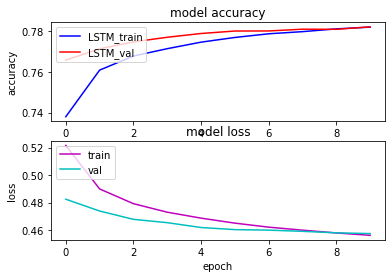

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

The model will output a prediction score between 0 and 1. We can classify two classes by defining a threshold value for it. In our case, I have set 0.5 as THRESHOLD value, if the score above it. Then it will be classified as **POSITIVE** sentiment.

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

320000/320000 [==============================] - 5s 14us/sample


### Confusion Matrix
Confusion Matrix provide a nice overlook at the model's performance in classification task

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

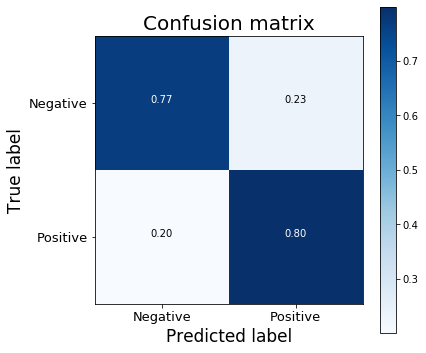

In [ ]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

### Classification Scores

In [ ]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78    160542
    Positive       0.77      0.80      0.79    159458

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [ ]:
类别评估（Negative 和 Positive）：

Precision（精确率）：
Negative 类别：精确率为 0.79，这意味着模型预测为 Negative 的所有样本中，有 79% 是真正的 Negative。
Positive 类别：精确率为 0.77，这意味着模型预测为 Positive 的所有样本中，有 77% 是真正的 Positive。
Recall（召回率）：
Negative 类别：召回率为 0.77，表示所有真实为 Negative 的样本中，模型正确预测了 77%。
Positive 类别：召回率为 0.80，表示所有真实为 Positive 的样本中，模型正确预测了 80%。
F1-Score（F1 得分）：
F1 得分是精确率和召回率的调和平均值。对于 Negative 类别，F1 得分为 0.78，对于 Positive 类别，F1 得分为 0.79。
Support（支持度）：
支持度表示每个类别在测试集中样本的数量。例如，Negative 类别有 160,542 个样本，Positive 类别有 159,458 个样本。

It's a pretty good model we trained here in terms of NLP. Around 80% accuracy is good enough considering the baseline human accuracy also pretty low in these tasks. Also, you may go on and explore the dataset, some tweets might have other languages than English. So our Embedding and Tokenizing wont have effect on them. But on practical scenario, this model is good for handling most tasks for Sentiment Analysis.

<h3>Some of the resource and people who help me learn some concepts</h3>
<font color='#008080'>
    <ul>
        <li> <b>Andrew NG's Seqence Model Course</b> at <a href="https://www.coursera.org/learn/nlp-sequence-models"> Coursera</a> </li>
    
<li> <b>Andrej Karpathy's Blog</b> on <a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">Effectiveness of RNN</a></li>

<li> <b>Intuitive Understanding of GloVe Embedding</b> on <a href="https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010">TDS</a></li>

<li> <b>Keras tutorial on Word Embedding</b> <a href="https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html"> here</a></li>

</ul>
</font>

> <font color='#696969'>I got to say like you, I am still at learning phase in terms of NLP. I have got lot to learn in future. I found that writing this notebook even though it is done by lot of people before me helps me with a deeper and complete understanding our the concepts that I am learning. Kaggle has been a amazing place to learn from and contribute to community of Data Science Aspirants.</font>

<h2><font color='red'> If you find this notebook usefull kindly UPVOTE this notebook. I am new to writting notebooks hope that would really encourage me to write and learn more.</font></h2>

<h5>Thanks in Advance. Have a nice day. Learn more and Happy Kaggle</h5>